In [1]:
import autoplier.model as ap
import json
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, average_precision_score
from onto_lib import general_ontology_tools as got
import numpy as np

Unable to import pygraphviz. Visualization is disabled.
Loading ontology from C:\Users\julia\anaconda3\envs\autoplierpubanalysis\lib\site-packages\onto_lib\obo\DOID.17-01-30.obo ...
Loading ontology from C:\Users\julia\anaconda3\envs\autoplierpubanalysis\lib\site-packages\onto_lib\obo\UBERON.17-01-30.obo ...
Loading ontology from C:\Users\julia\anaconda3\envs\autoplierpubanalysis\lib\site-packages\onto_lib\obo\CL.18-11-13.obo ...
Loading ontology from C:\Users\julia\anaconda3\envs\autoplierpubanalysis\lib\site-packages\onto_lib\obo\CVCL.17-01-30.obo ...
Loading ontology from C:\Users\julia\anaconda3\envs\autoplierpubanalysis\lib\site-packages\onto_lib\obo\EFO.17-01-30.obo ...


In [2]:
import os
os.environ['R_HOME'] = r"C:\Users\julia\anaconda3\envs\autoplier_analysis\Lib\R"

In [3]:
import rpy2.robjects.packages as rpackages
from rpy2.robjects.packages import importr
utils = importr('utils')
devtool = rpackages.importr('devtools')

In [4]:
from rpy2.robjects.packages import importr
PLIER = importr("PLIER")

In [6]:
import pandas as pd
import csv
pathway_genes = []
pathway_names = []

with open('data/c2.cp.v7.4.symbols.gmt', newline='\n') as csvfile:
    reader = csv.reader(csvfile, delimiter='\t')
    for row in reader:
        pathway_names += [row[0]]
        pathway_genes += [row[2:]]
        
with open("data/bulk_labels.json", 'r') as f:
    labels = json.load(f)

In [7]:
from sklearn.preprocessing import MultiLabelBinarizer
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback

In [8]:
mlb = MultiLabelBinarizer()
pathways = pd.DataFrame(mlb.fit_transform(pathway_genes), index = pathway_names, columns = mlb.classes_)

In [9]:
rnaseq = pd.read_csv("data/mat4.csv",index_col = 0)

In [10]:
rnaseq

,SRX890545,SRX1067711,SRX1067710,SRX762971,SRX762970,SRX762973,SRX762972,SRX762975,SRX762974,SRX762977,...,SRX3399303,SRX3399304,SRX3399305,SRX3399306,SRX3399307,SRX3399308,SRX3399309,SRX3399310,SRX3399311,SRX3399312
TSPAN6,0.071963,0.033104,0.233484,0.000000,0.000000,0.000000,0.102932,0.131920,0.232341,0.034728,...,0.042281,0.338865,0.371627,0.583676,0.909566,0.900313,0.317015,0.799190,0.044163,1.064050
TNMD,0.068414,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DPM1,3.718085,3.743323,3.376271,0.270898,0.000000,1.679924,0.626225,1.564313,1.720021,0.379428,...,3.686067,3.661880,4.096357,3.766411,3.917474,4.034299,3.972622,4.109202,4.007751,3.668019
SCYL3,2.184815,1.990195,1.523096,0.272666,0.153331,0.586564,0.636529,0.605535,1.045735,0.316442,...,2.326043,2.357105,2.936465,2.712422,2.744322,2.548069,2.634532,2.661645,2.015217,2.255745
C1orf112,1.490935,1.780348,0.611052,0.046180,0.029985,0.075667,0.060057,0.136639,0.213615,0.011401,...,1.636744,1.464241,3.026844,2.494577,1.895236,1.914284,2.009371,2.445280,1.989733,2.194389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CTD-2331H12.9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
RP11-122G18.12,1.208610,0.647963,0.697612,0.751671,0.520262,0.915725,1.107029,0.726533,1.271407,0.627059,...,0.858695,1.825129,1.387390,0.953148,1.342535,0.976151,1.115170,0.698829,1.192115,0.810953
RP5-937E21.8,0.086928,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.715472,0.482831
RP11-606M12.1,0.149827,0.000000,0.306894,0.000000,0.000000,0.000000,0.204761,0.062334,0.000000,0.291815,...,0.138795,0.644069,0.404581,0.299244,0.123563,0.455072,0.386765,0.148570,0.605566,0.157699


In [11]:
# Autoplier callbacks
callbacks = [
        #early stopping - to mitigate overfitting
        EarlyStopping(patience=100, monitor='val_loss'),
        #monitor umatrix sparsity
        ]

In [12]:
# train test split
with open('data/validation_bulk_experiments.json', 'r') as f:
    validation_egs = json.load(f)

with open('data/pre_training_bulk_experiments.json', 'r') as f:
    train_egs = json.load(f)

In [13]:
sample2types_full = {
        sample: list(map(got.get_term_name, types_ids))
        for sample, types_ids in labels.items()
    }

In [14]:
mlb_full = MultiLabelBinarizer()

types_per_samples = rnaseq.T.index.map(sample2types_full).values
samples_dummies = pd.DataFrame(mlb_full.fit_transform(types_per_samples), columns=mlb_full.classes_,
                                      index=rnaseq.T.index)

celltypes = samples_dummies.columns.tolist()

type2samples = {
    type_: samples_dummies.index[samples_dummies[type_] == 1].tolist()
    for type_ in celltypes
}
types_sizes = samples_dummies.sum()
types_with_data = types_sizes.index.values
all_types = samples_dummies.columns

In [15]:
# fscore metric used to evaluate classifiers
def fscore(p, r):
    denom = p + r or 1

    return 2*(p * r) / denom

In [16]:
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri

from rpy2.robjects.conversion import localconverter
with localconverter(ro.default_converter + pandas2ri.converter):
        rnaseq_r = ro.conversion.py2rpy(rnaseq)
        pathways_r = ro.conversion.py2rpy(pathways.T)


In [17]:
pathways_r

BIOCARTA_GRANULOCYTES_PATHWAY,BIOCARTA_LYM_PATHWAY,BIOCARTA_BLYMPHOCYTE_PATHWAY,...,REACTOME_ANTIGEN_ACTIVATES_B_CELL_RECEPTOR_BCR_LEADING_TO_GENERATION_OF_SECOND_MESSENGERS,REACTOME_SIGNALING_BY_THE_B_CELL_RECEPTOR_BCR,REACTOME_ION_CHANNEL_TRANSPORT
0,0,0,...,0,0,0
0,0,0,,0,0,0
0,0,0,,0,0,0
0,0,0,,0,0,0
...,...,...,,...,...,...
0,0,0,,0,0,0
0,0,0,,0,0,0
0,0,0,,0,0,0
0,0,0,,0,0,0


In [18]:
from rpy2.robjects.packages import importr

base = importr('base')
rnaseqmat = base.as_matrix(rnaseq_r, rownames= True)
pathwaymat = base.as_matrix(pathways_r, rownames= True)

In [19]:
def train_PLIER(LV, matrix_r, pathways_r, seed):
    Plier_result = PLIER.PLIER(matrix_r, pathways_r, k=LV, seed=seed)
    B = Plier_result[1]
    with localconverter(ro.default_converter + pandas2ri.converter):
        B_df = pd.DataFrame(ro.conversion.rpy2py(B), index = B.rownames, columns = B.colnames )
    return(B_df.T)

In [20]:
from sklearn.preprocessing import MinMaxScaler
def train_autoPLIER(LV, matrix, pathways, seed, callbacks):
    ap.set_seed_(seed)
    model = ap.autoPLIER(LV, regval = 1.20E-7,learning_rate= 0.000156, scaler = None)
    model.fit(matrix, pathways, verbose=0, batch_size = None, callbacks = callbacks)
    Z = model.transform(matrix, pathways)
    
    
    
    return Z

In [21]:
import matplotlib.pyplot as plt
def train_classifiers(train_target_full, test_target_full, train_data, test_data):
    
    test_precision = []
    test_recall = []
    aps = []
    fscores = []
    successful_celltypes = []
    unsuccessful_celltypes = []
    for cell_type in all_types:
        
        train_target = train_target_full[str(cell_type)]
        test_target = test_target_full[cell_type]

        if(1 in train_target.values and 1 in test_target.values and 0 in train_target.values and 0 in test_target.values):
        # lasso penalty

            clf = LogisticRegression(solver = "liblinear",penalty = "l2",random_state=111, max_iter = 1000, C = 0.45)

            clf.fit(train_data, train_target)
            target_pred = clf.predict(test_data)
            target_probs = clf.predict_proba(test_data)[:,1]
            test_pr = average_precision_score(test_target, target_probs)
            test_precision += [precision_score(test_target, target_pred)]
            test_recall += [recall_score(test_target, target_pred)]
            aps += [average_precision_score(test_target, target_probs)]
            fscores += [fscore(test_precision[-1], test_recall[-1])]
            
            
            successful_celltypes += [cell_type]
        else:
            unsuccessful_celltypes += [cell_type]

    p = np.mean(test_precision)
    r = np.mean(test_recall)
    f= np.mean(fscores)
    f_micro = fscore(p, r) 
    ap = np.mean(aps)
    sd_f = np.std(f)
    sd_ap = np.std(aps)
    report = pd.DataFrame(list(zip(test_precision, test_recall, aps, fscores)), columns = ["precision",
             "recall","Average Precision","F1 score"], index = successful_celltypes)
    return(report)

In [22]:
from sklearn.metrics import PrecisionRecallDisplay
def train_classifiers_new(train_target_full, test_target_full, train_data, test_data, types):
    
    test_precision = []
    test_recall = []
    aps = []
    fscores = []
    successful_celltypes = []
    unsuccessful_celltypes = []
    for cell_type in types:
        
        train_target = train_target_full[str(cell_type)]
        test_target = test_target_full[cell_type]

        if(1 in train_target.values and 1 in test_target.values and 0 in train_target.values and 0 in test_target.values):
        # lasso penalty

            clf = LogisticRegression(solver = "liblinear",penalty = "l2",random_state=111, max_iter = 1000, C = 0.45)

            clf.fit(train_data, train_target)
            target_pred = clf.predict(test_data)
            target_probs = clf.predict_proba(test_data)[:,1]
            test_pr = average_precision_score(test_target, target_probs)
            test_precision += [precision_score(test_target, target_pred)]
            test_recall += [recall_score(test_target, target_pred)]
            aps += [average_precision_score(test_target, target_probs)]
            fscores += [fscore(test_precision[-1], test_recall[-1])]
            PrecisionRecallDisplay.from_predictions(test_target, target_pred)
            plt.show()
            print(test_pr)
            successful_celltypes += [cell_type]
        else:
            unsuccessful_celltypes += [cell_type]

    p = np.mean(test_precision)
    r = np.mean(test_recall)
    f= np.mean(fscores)
    f_micro = fscore(p, r) 
    ap = np.mean(aps)
    sd_f = np.std(f)
    sd_ap = np.std(aps)
    report = pd.DataFrame(list(zip(test_precision, test_recall, aps, fscores)), columns = ["precision",
             "recall","Average Precision","F1 score"], index = successful_celltypes)
    return(report)

In [23]:
B = train_PLIER(150, rnaseqmat, pathwaymat, 111)
Z = train_autoPLIER(150, rnaseq.T, pathways, 111, callbacks)

Z_train = Z[Z.index.isin(train_egs)]
Z_test = Z[Z.index.isin(validation_egs)]
    
B_train = B[B.index.isin(train_egs)]
B_test = B[B.index.isin(validation_egs)]

train_target_ap = samples_dummies[samples_dummies.index.isin(Z_train.index)]
test_target_ap = samples_dummies[samples_dummies.index.isin(Z_test.index)]
    
train_target_p = samples_dummies[samples_dummies.index.isin(B_train.index)]
test_target_p = samples_dummies[samples_dummies.index.isin(B_test.index)]

report_ap = train_classifiers(train_target_ap, test_target_ap, Z_train, Z_test)
report_p = train_classifiers(train_target_p, test_target_p, B_train, B_test)


R[write to console]: Selecting common genes: 12839

R[write to console]: Removing 483 pathways with too few genes

R[write to console]: Computing SVD

R[write to console]: Using rsvd

R[write to console]: Done



[1] 147.6473
[1] "L2 is set to 147.647332567402"
[1] "L1 is set to 73.8236662837008"


R[write to console]: errorY (SVD based:best possible) = 0.4658

R[write to console]: New L3 is 0.00103329763864764

R[write to console]: New L3 is 0.000804733010124613

R[write to console]: New L3 is 0.000710174388842549

R[write to console]: New L3 is 0.000804733010124613

R[write to console]: New L3 is 0.000804733010124613

R[write to console]: Bdiff is not decreasing

R[write to console]: Bdiff is not decreasing

R[write to console]: Bdiff is not decreasing

R[write to console]: New L3 is 0.000710174388842549

R[write to console]: Bdiff is not decreasing

R[write to console]: Bdiff is not decreasing

R[write to console]: Bdiff is not decreasing

R[write to console]: converged at  iteration 122 Bdiff is not decreasing

R[write to console]: There are 57  LVs with AUC>0.70

C:\Users\julia\anaconda3\envs\autoplierpubanalysis\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `z

C:\Users\julia\anaconda3\envs\autoplierpubanalysis\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\julia\anaconda3\envs\autoplierpubanalysis\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\julia\anaconda3\envs\autoplierpubanalysis\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\julia\anaconda3\envs\autoplierp

C:\Users\julia\anaconda3\envs\autoplierpubanalysis\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\julia\anaconda3\envs\autoplierpubanalysis\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\julia\anaconda3\envs\autoplierpubanalysis\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\julia\anaconda3\envs\autoplierp

C:\Users\julia\anaconda3\envs\autoplierpubanalysis\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\julia\anaconda3\envs\autoplierpubanalysis\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\julia\anaconda3\envs\autoplierpubanalysis\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\julia\anaconda3\envs\autoplierp

C:\Users\julia\anaconda3\envs\autoplierpubanalysis\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

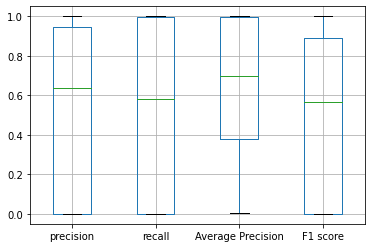

In [24]:
report_ap.boxplot()

<AxesSubplot:>

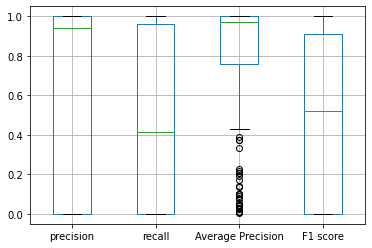

In [25]:
report_p.boxplot()

In [26]:
report_ap.mean()

precision            0.526267
recall               0.532509
Average Precision    0.636983
F1 score             0.494805
dtype: float64

In [27]:
report_p.mean()

precision            0.591108
recall               0.444097
Average Precision    0.800962
F1 score             0.469311
dtype: float64

In [28]:
report_ap.std()

precision            0.414652
recall               0.421700
Average Precision    0.356306
F1 score             0.398894
dtype: float64

In [29]:
report_p.std()

precision            0.470643
recall               0.427992
Average Precision    0.313944
F1 score             0.426667
dtype: float64

In [30]:
report_ap[report_ap["F1 score"] == 0]

,precision,recall,Average Precision,F1 score
"CD14-positive, CD16-negative classical monocyte",0.0,0.0,0.073875,0.0
CD141-positive myeloid dendritic cell,0.0,0.0,0.017017,0.0
CD4-positive helper T cell,0.0,0.0,0.643770,0.0
"CD4-positive, CD25-positive, alpha-beta regulatory T cell",0.0,0.0,0.012762,0.0
"CD4-positive, CXCR3-negative, CCR6-negative, alpha-beta T cell",0.0,0.0,0.484094,0.0
...,...,...,...,...
supportive cell,0.0,0.0,0.024064,0.0
surfactant secreting cell,0.0,0.0,0.054616,0.0
trophectodermal cell,0.0,0.0,0.125000,0.0
type B pancreatic cell,0.0,0.0,0.056548,0.0


In [31]:
report_p[report_p["F1 score"] == 0]

,precision,recall,Average Precision,F1 score
"CD14-positive, CD16-negative classical monocyte",0.0,0.0,0.142065,0.0
CD141-positive myeloid dendritic cell,0.0,0.0,1.000000,0.0
CD1c-positive myeloid dendritic cell,0.0,0.0,0.913896,0.0
CD4-positive helper T cell,0.0,0.0,0.956641,0.0
"CD4-positive, CD25-positive, alpha-beta regulatory T cell",0.0,0.0,0.031933,0.0
...,...,...,...,...
surfactant secreting cell,0.0,0.0,0.757576,0.0
trophectodermal cell,0.0,0.0,0.333333,0.0
type II pneumocyte,0.0,0.0,0.757576,0.0
vascular associated smooth muscle cell,0.0,0.0,1.000000,0.0


In [32]:
report_ap[report_ap["F1 score"] == 0][report_p["F1 score"] == 0]

C:\Users\julia\AppData\Local\Temp/ipykernel_14044/753669256.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  report_ap[report_ap["F1 score"] == 0][report_p["F1 score"] == 0]


,precision,recall,Average Precision,F1 score
"CD14-positive, CD16-negative classical monocyte",0.0,0.0,0.073875,0.0
CD141-positive myeloid dendritic cell,0.0,0.0,0.017017,0.0
CD4-positive helper T cell,0.0,0.0,0.643770,0.0
"CD4-positive, CD25-positive, alpha-beta regulatory T cell",0.0,0.0,0.012762,0.0
"CD4-positive, CXCR3-negative, CCR6-negative, alpha-beta T cell",0.0,0.0,0.484094,0.0
"CD8-positive, alpha-beta memory T cell",0.0,0.0,0.401301,0.0
Kupffer cell,0.0,0.0,0.005283,0.0
Sertoli cell,0.0,0.0,0.003257,0.0
T-helper 2 cell,0.0,0.0,0.484094,0.0
alveolar macrophage,0.0,0.0,0.451240,0.0


In [33]:
report_ap[report_ap["F1 score"] == 0][report_p["F1 score"] != 0]

C:\Users\julia\AppData\Local\Temp/ipykernel_14044/2228151521.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  report_ap[report_ap["F1 score"] == 0][report_p["F1 score"] != 0]


,precision,recall,Average Precision,F1 score
central nervous system macrophage,0.0,0.0,0.546032,0.0
ecto-epithelial cell,0.0,0.0,0.156111,0.0
epidermal cell,0.0,0.0,0.525000,0.0
epithelial cell of prostate,0.0,0.0,0.188290,0.0
general ecto-epithelial cell,0.0,0.0,0.525000,0.0
insulin secreting cell,0.0,0.0,0.056548,0.0
keratin accumulating cell,0.0,0.0,0.525000,0.0
keratinizing barrier epithelial cell,0.0,0.0,0.525000,0.0
keratinocyte,0.0,0.0,0.525000,0.0
microglial cell,0.0,0.0,0.546032,0.0


In [34]:
report_p[report_p["F1 score"] == 0][report_ap["F1 score"] != 0]

C:\Users\julia\AppData\Local\Temp/ipykernel_14044/36635714.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  report_p[report_p["F1 score"] == 0][report_ap["F1 score"] != 0]


,precision,recall,Average Precision,F1 score
CD1c-positive myeloid dendritic cell,0.0,0.0,0.913896,0.0
CD7-negative lymphoid progenitor OR granulocyte monocyte progenitor,0.0,0.0,0.812302,0.0
antibody secreting cell,0.0,0.0,1.000000,0.0
bone cell,0.0,0.0,0.387062,0.0
"central memory CD4-positive, alpha-beta T cell",0.0,0.0,0.504550,0.0
contractile cell,0.0,0.0,0.215777,0.0
cumulus cell,0.0,0.0,0.076923,0.0
effector T cell,0.0,0.0,0.759743,0.0
erythrocyte,0.0,0.0,1.000000,0.0
erythroid lineage cell,0.0,0.0,1.000000,0.0


In [35]:
intersection = report_ap[report_ap["F1 score"] == 0][report_p["F1 score"] == 0]

C:\Users\julia\AppData\Local\Temp/ipykernel_14044/2438030617.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  intersection = report_ap[report_ap["F1 score"] == 0][report_p["F1 score"] == 0]


In [36]:
report_ap_without = report_ap[~report_ap.index.isin(intersection.index)]

In [37]:
report_ap_without

,precision,recall,Average Precision,F1 score
B cell,0.600000,0.631579,0.671908,0.615385
CD14-positive monocyte,0.594595,0.785714,0.535544,0.676923
CD1c-positive myeloid dendritic cell,0.250000,0.083333,0.433514,0.125000
"CD4-positive, alpha-beta T cell",0.912162,0.985401,0.987861,0.947368
"CD4-positive, alpha-beta memory T cell",0.915094,0.950980,0.982382,0.932692
...,...,...,...,...
type A enterocrine cell,0.074074,1.000000,0.700000,0.137931
type B pancreatic cell,0.000000,0.000000,0.056548,0.000000
vascular associated smooth muscle cell,1.000000,1.000000,1.000000,1.000000
vein endothelial cell,0.750000,1.000000,1.000000,0.857143


In [38]:
report_p_without = report_p[~report_p.index.isin(intersection.index)]

In [39]:
report_p_without

,precision,recall,Average Precision,F1 score
B cell,1.000000,0.631579,0.717315,0.774194
CD14-positive monocyte,0.696970,0.821429,0.828867,0.754098
CD1c-positive myeloid dendritic cell,0.000000,0.000000,0.913896,0.000000
"CD4-positive, alpha-beta T cell",0.969925,0.941606,0.992732,0.955556
"CD4-positive, alpha-beta memory T cell",1.000000,0.539216,0.998220,0.700637
...,...,...,...,...
type A enterocrine cell,1.000000,0.500000,1.000000,0.666667
type B pancreatic cell,0.666667,1.000000,1.000000,0.800000
vascular associated smooth muscle cell,0.000000,0.000000,1.000000,0.000000
vein endothelial cell,0.750000,1.000000,1.000000,0.857143


In [40]:
report_ap_without.mean()

precision            0.687437
recall               0.695590
Average Precision    0.776910
F1 score             0.646339
dtype: float64

In [41]:
report_p_without.mean()

precision            0.772134
recall               0.580101
Average Precision    0.902107
F1 score             0.613037
dtype: float64

<AxesSubplot:>

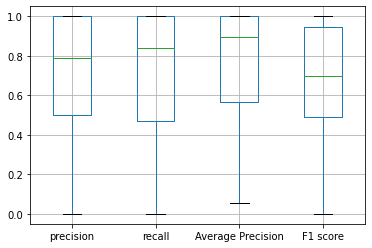

In [42]:
report_ap_without.boxplot()

<AxesSubplot:>

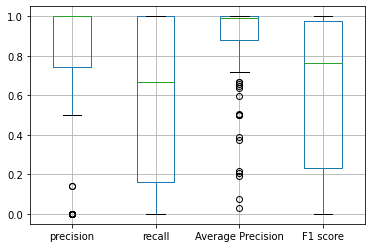

In [43]:
report_p_without.boxplot()

In [44]:
report_p_wi_full = report_p[report_p["F1 score"] != 0]

In [45]:
report_ap_wi_full = report_ap[report_ap["F1 score"] != 0]

In [46]:
report_p_wi_full.mean()

precision            0.943065
recall               0.708521
Average Precision    0.931660
F1 score             0.748747
dtype: float64

In [47]:
report_ap_wi_full.mean()

precision            0.748230
recall               0.757104
Average Precision    0.810075
F1 score             0.703498
dtype: float64